In [2]:
%matplotlib inline
from imdb import IMDb
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

ia = IMDb()

def get_scores (title):
    # add check that this is a tv series
    series = ia.search_movie(title)
    series = [x for x in series if x["kind"]=="tv series"][0]
    
    ia.update(series, 'episodes')

    all_scores = []
    number_votes = []

    for season_nr in sorted(series['episodes']):
        scores = []
        for episode_nr in sorted(series['episodes'][season_nr]):
            episode = series['episodes'][season_nr][episode_nr]
            rating = episode.get('rating')
            votes = episode.get('votes')
            # just catching some issues in the data
            if rating and rating >0.0 and rating < 10.0:
                scores.append(rating)
                number_votes.append(votes)
        # if there are at least 2 episodes
        if len(scores)>1:
            all_scores.append(scores)
    return all_scores, number_votes

def make_series_plot(title):
    all_scores,number_votes = get_scores(title)    
    ct = 0
    fig=plt.figure(figsize=(12,10), dpi= 100)

    for season_scores in all_scores:
        order = [ct+x for x in range(len(season_scores))]
        x = np.array(order)
        y = np.array(season_scores)
        plt.scatter(x, y)
        plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

        ct+=len(order)
    plt.title(title)
    plt.xlabel("Episode Number")
    plt.ylabel("IMDB Score")
    plt.ylim((0.0,10.0))
    plt.show()
    #plt.savefig("test.png")

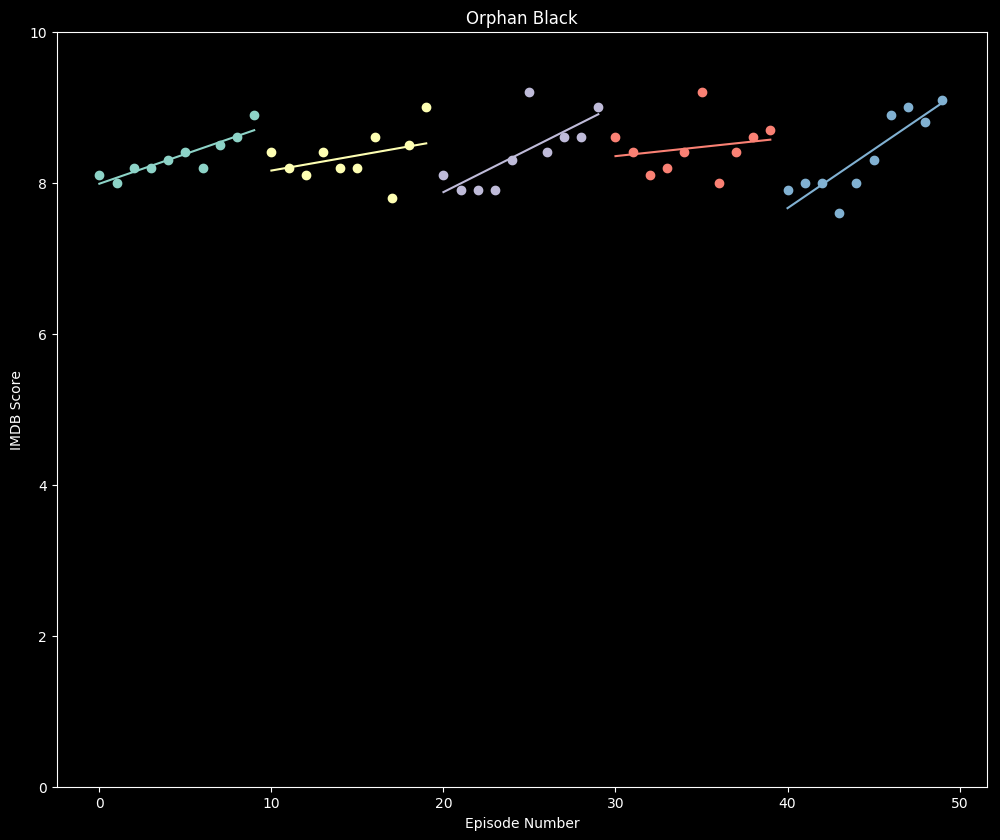

In [3]:
make_series_plot("Orphan Black")

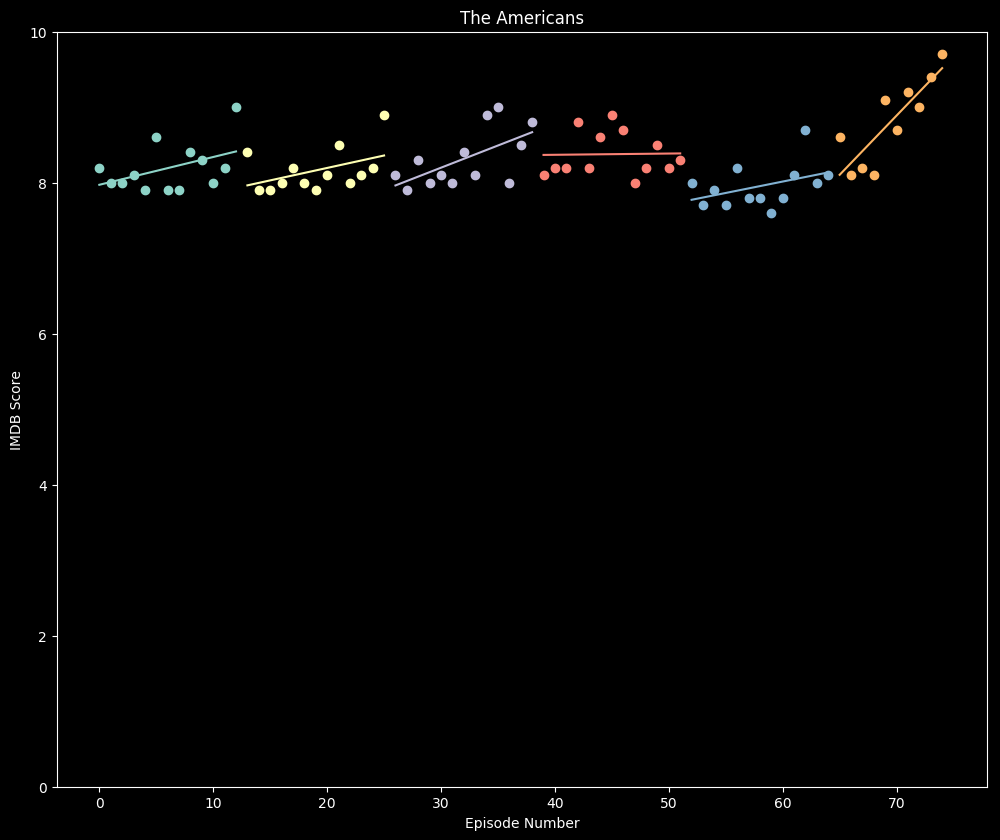

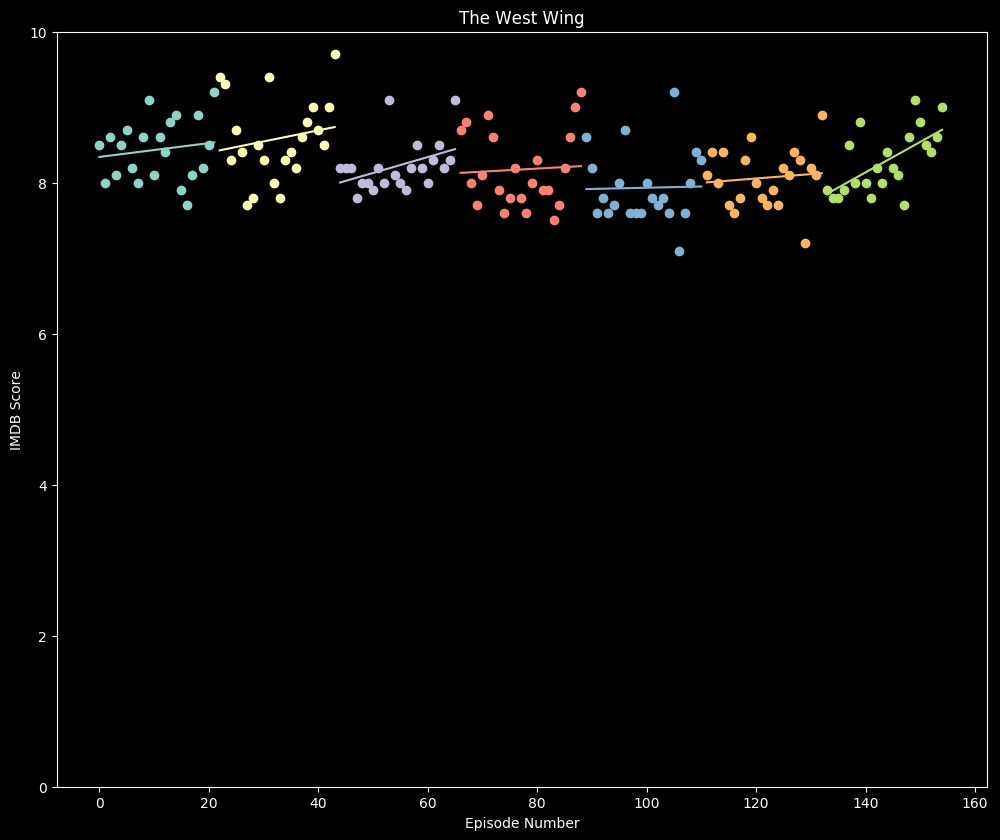

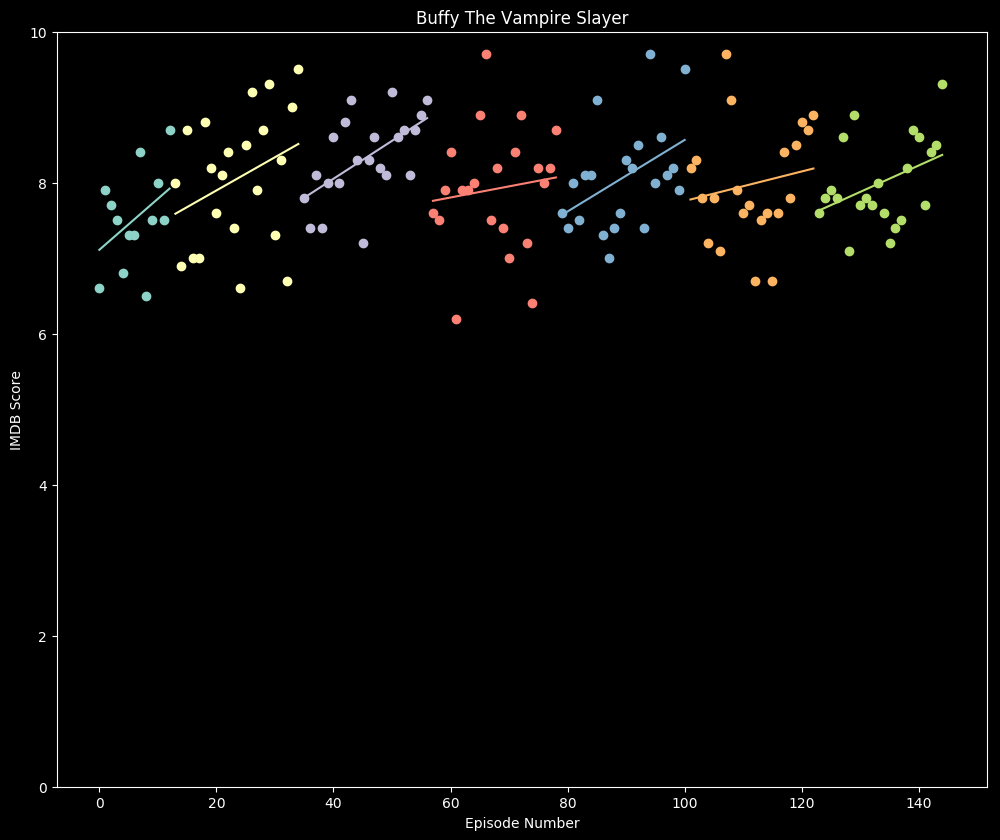

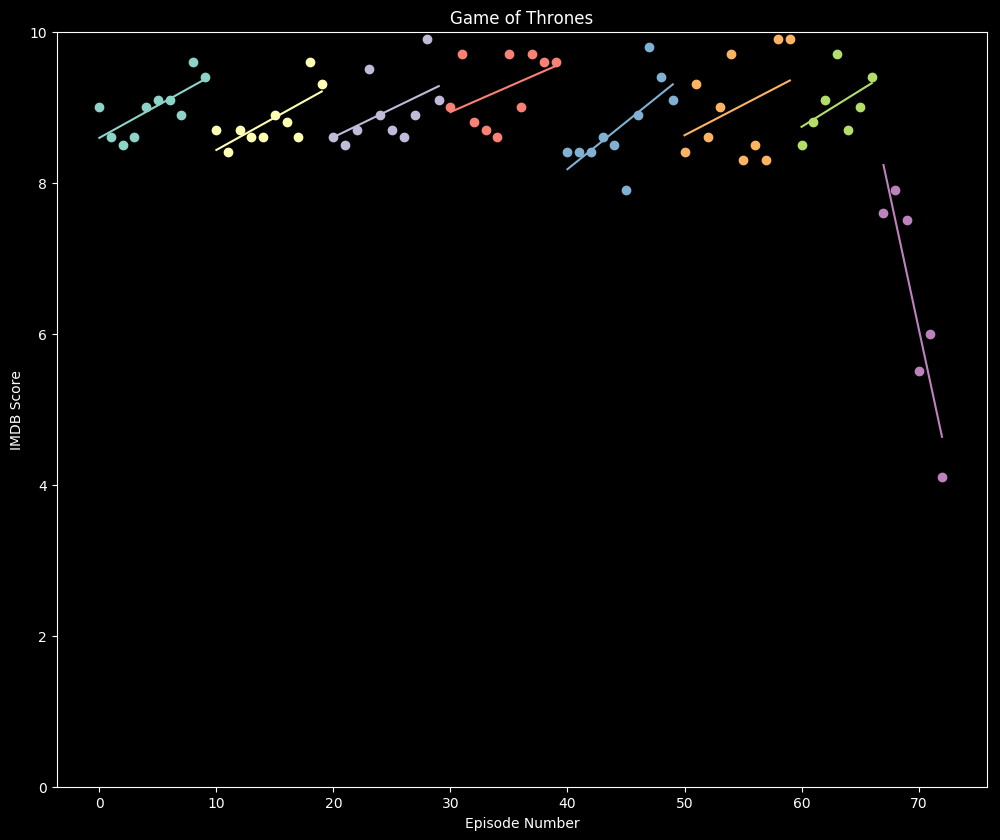

In [4]:
titles = ["The Americans","The West Wing","Buffy The Vampire Slayer", "Game of Thrones"]
for title in titles:
    make_series_plot(title)


In [ ]:
# work in progress

#from mal import AnimeSearch

#search = AnimeSearch("Shokugeki no Souma") # Search for "cowboy bebop"

#for result in search.results:
#    print (result.title, result.url)